In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.manifold import TSNE
from pathlib import Path
from PIL import Image
from google.colab import drive

# Define the paths for train, validation, and test datasets

In [ ]:
drive.mount('/content/gdrive')

train_data_path = Path("/content/gdrive/MyDrive/AI PROJECT DATASET/train")
valid_data_path = Path("/content/gdrive/MyDrive/AI PROJECT DATASET/valid")
test_data_path = Path("/content/gdrive/MyDrive/AI PROJECT DATASET/test")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Function to load the images and generate labels

In [ ]:
def load_images_and_labels(dataset_path):
    images = []
    labels = []
    class_names = sorted(os.listdir(dataset_path))

    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(dataset_path, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = Image.open(image_path)
            images.append(np.array(image))
            labels.append(i)

    return np.array(images), np.array(labels)

# Load train, validation, and test datasets

In [ ]:
X_train, y_train = load_images_and_labels(train_data_path)
X_valid, y_valid = load_images_and_labels(valid_data_path)
X_test, y_test = load_images_and_labels(test_data_path)

# Preprocess and resize the image data

In [ ]:
def preprocess_resize(images):
    processed_images = []
    for image in images:
        # Resize the image to a desired size (e.g., 32x32 pixels)
        resized_image = Image.fromarray(image).resize((32, 32))
        # Convert the resized image to a numpy array
        processed_images.append(np.array(resized_image))
    return np.array(processed_images)

# Preprocess and resize the train, validation, and test datasets

In [ ]:
X_train = preprocess_resize(X_train)
X_valid = preprocess_resize(X_valid)
X_test = preprocess_resize(X_test)

# Flatten the image data

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_valid = X_valid.reshape(X_valid.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Define the hyperparameters for tuning

In [ ]:
hyperparameters = {
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter tuning using GridSearchCV

In [ ]:
classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(classifier, hyperparameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

# Retrieve the best model from GridSearchCV

In [ ]:
classifier = grid_search.best_estimator_

# Train the decision tree classifier

In [ ]:
classifier.fit(X_train, y_train)
# for i in range(0,30):
#     print(str(i) + " Iteration Completed")
#     classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10)

# Predict on the validation set

In [ ]:
y_valid_pred = classifier.predict(X_valid)

# Calculate evaluation metrics on the validation set

In [ ]:
accuracy = accuracy_score(y_valid, y_valid_pred)
precision = precision_score(y_valid, y_valid_pred, average='macro')
recall = recall_score(y_valid, y_valid_pred, average='macro')
f1 = f1_score(y_valid, y_valid_pred, average='macro')
confusion = confusion_matrix(y_valid, y_valid_pred)

In [ ]:
print("Validation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusion)

Validation Metrics:
Accuracy: 0.2579185520361991
Precision: 0.25234645803048816
Recall: 0.2514800822381451
F1-score: 0.2510383659474704
Confusion Matrix:
[[39  7 16 12  8 12 14  5 12 13]
 [12 63 14  6  7  5  4  8  8 10]
 [26  8 26 15  8 10 14 12  9 10]
 [22  8 12 19 15 11 12 10 12 17]
 [11  6 12  6 52 19 10  7  8  7]
 [ 9  5 18 12 19 32  8  9 15 10]
 [14  9 18  6  8  9  6  3 13  8]
 [18 11 20 20 11  7  2 41  3  5]
 [11  4 10 15 16 18  4 16 26  9]
 [16 12 11 19  8  8  4 11 12 38]]


# Predict on the test set

In [ ]:
y_test_pred = classifier.predict(X_test)

# Calculate evaluation metrics on the test set

In [ ]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
confusion = confusion_matrix(y_test, y_test_pred)

In [ ]:
print("Test Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusion)

Test Metrics:
Accuracy: 0.26751117734724295
Precision: 0.2650611422605505
Recall: 0.2626867109215233
F1-score: 0.2625739726026627
Confusion Matrix:
[[35  7 25 15 11 11  5 14  8  9]
 [ 6 58 11 15  5  8  2 15  6 13]
 [20 14 31 15 14 13  5 11  8  9]
 [22  6  8 35 13 10  6 12 18 10]
 [ 7  3 17  9 55 15  8  9 13  4]
 [12 11 18  9 25 26  9 10 11  8]
 [11  6 17  8  3 10 12  6 15  7]
 [13  7 19 21  8  8  1 41 11 11]
 [14  8 12 12 11 12 14  7 29 10]
 [16 15 12 13  8  4  3 20 12 37]]


# Perform t-SNE dimensionality reduction on the test set

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test)


# Plot t-SNE graph

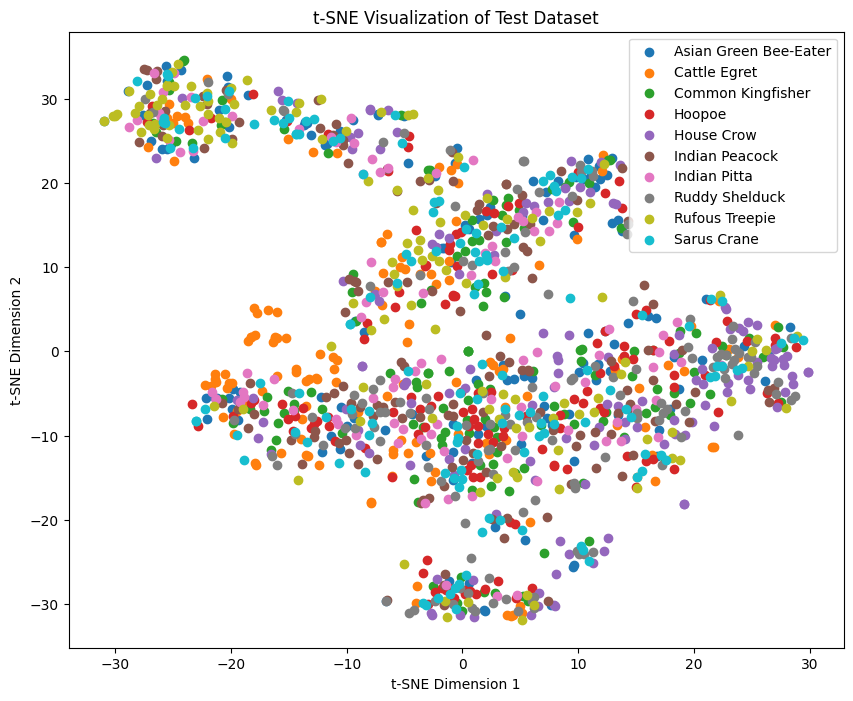

In [ ]:
class_names = ['Asian Green Bee-Eater', 'Cattle Egret', 'Common Kingfisher', 'Hoopoe', 'House Crow', 'Indian Peacock', 'Indian Pitta', 'Ruddy Shelduck', 'Rufous Treepie', 'Sarus Crane']

plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    indices = np.where(y_test == i)
    plt.scatter(X_test_tsne[indices, 0], X_test_tsne[indices, 1], label=class_names[i])

plt.title('t-SNE Visualization of Test Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

# Plot Confusion Matrix

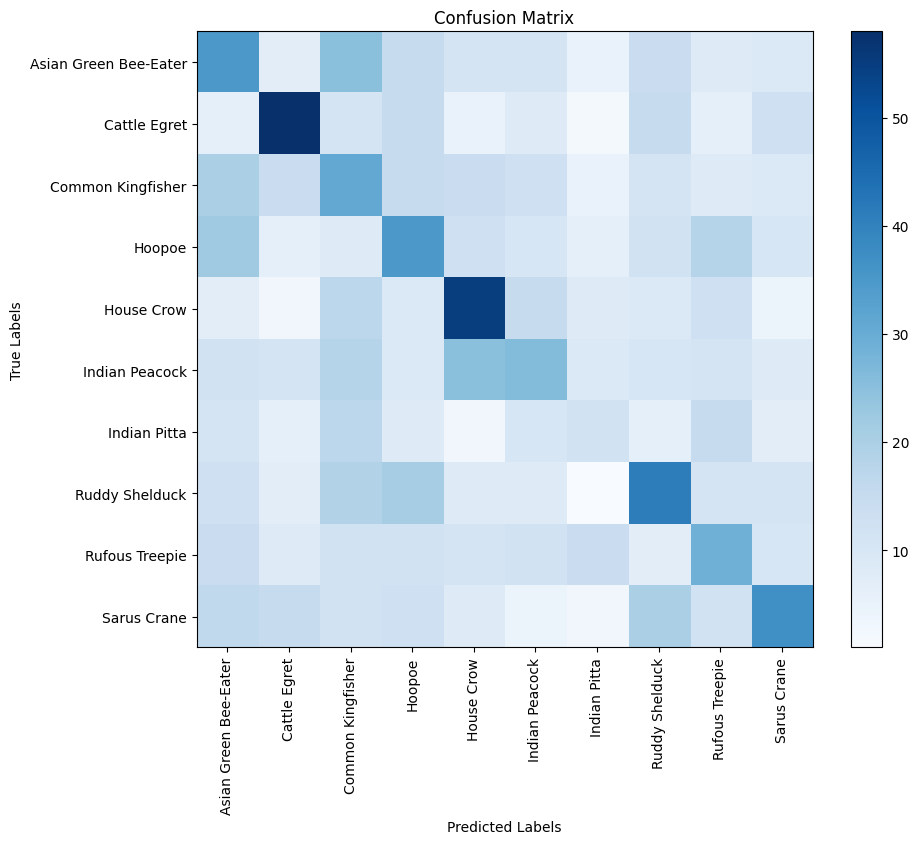

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(confusion, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(class_names)), class_names, rotation=90)
plt.yticks(np.arange(len(class_names)), class_names)
plt.colorbar()
plt.show()